In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# let's import the data 
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape


(1599, 12)

### Preprocessing the dataset

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
# to check data types and values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


all data types is ok and there is no null value present

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

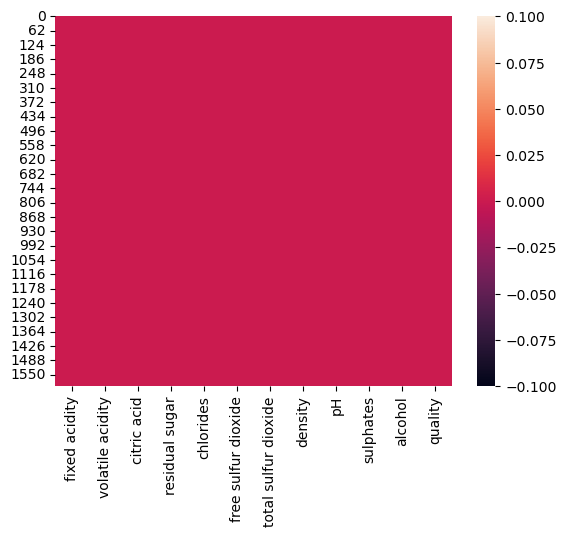

In [9]:
sns.heatmap(df.isnull())

We can see there is no null values

In [10]:
df.nunique().to_frame('no. of unique value')

,no. of unique value
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [11]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

we can see there is 6 unique value present i.e. quality range is between 3 - 8 , here 3 is poor quality and 8 is best premium quality

In [12]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Here we can check -

in column fixed acidity, residual sugar, free sulfur dioxide, total sulfur dioxide mean is greater then median(50%) then some skewness also present here

in column fixed acidity, residual sugar, free sulfur dioxide, total sulfur dioxide , there are huge diffrence in 75% and max thus outliers also present.

### Correlation

In [15]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


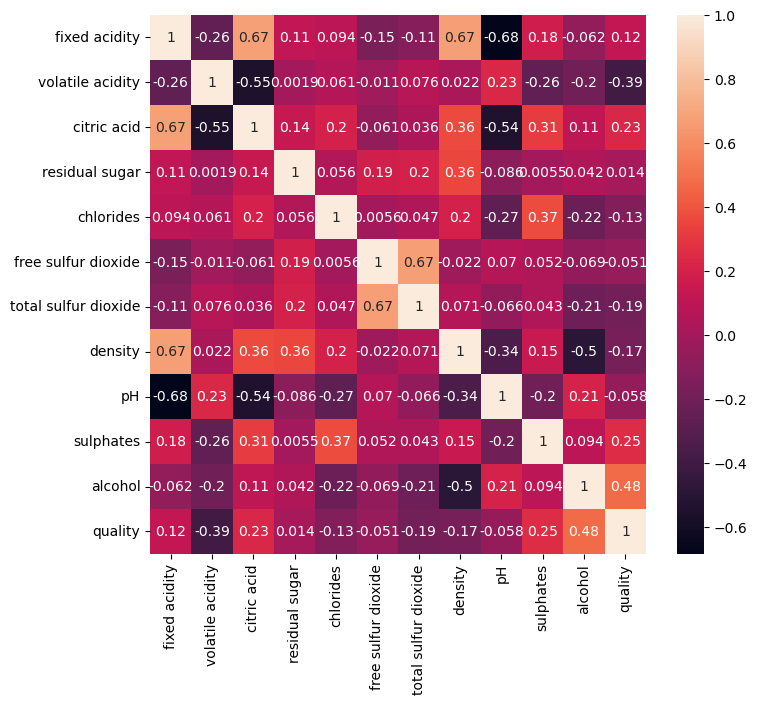

In [16]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

here we can see that alcohol and ph is highly correlated with density volatile acidity and alcohol is highly correlated with quality

### EDA

In [17]:
df.dtypes.values

array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('int64')], dtype=object)

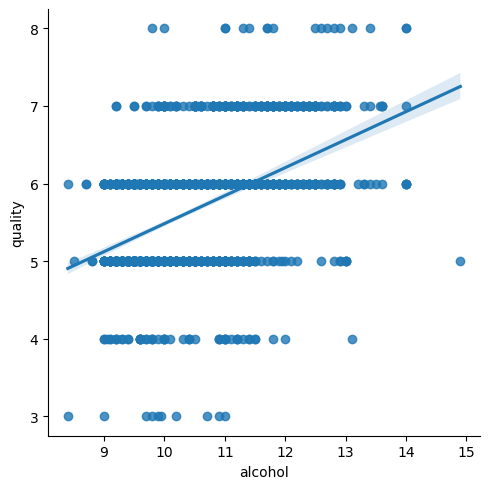

In [18]:
sns.lmplot(x = 'alcohol', y= 'quality',data =df, palette='colorblind')

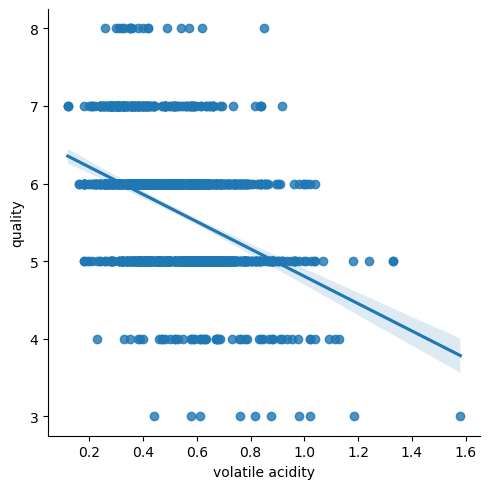

In [19]:
sns.lmplot(x = 'volatile acidity', y= 'quality',data =df, palette='colorblind')

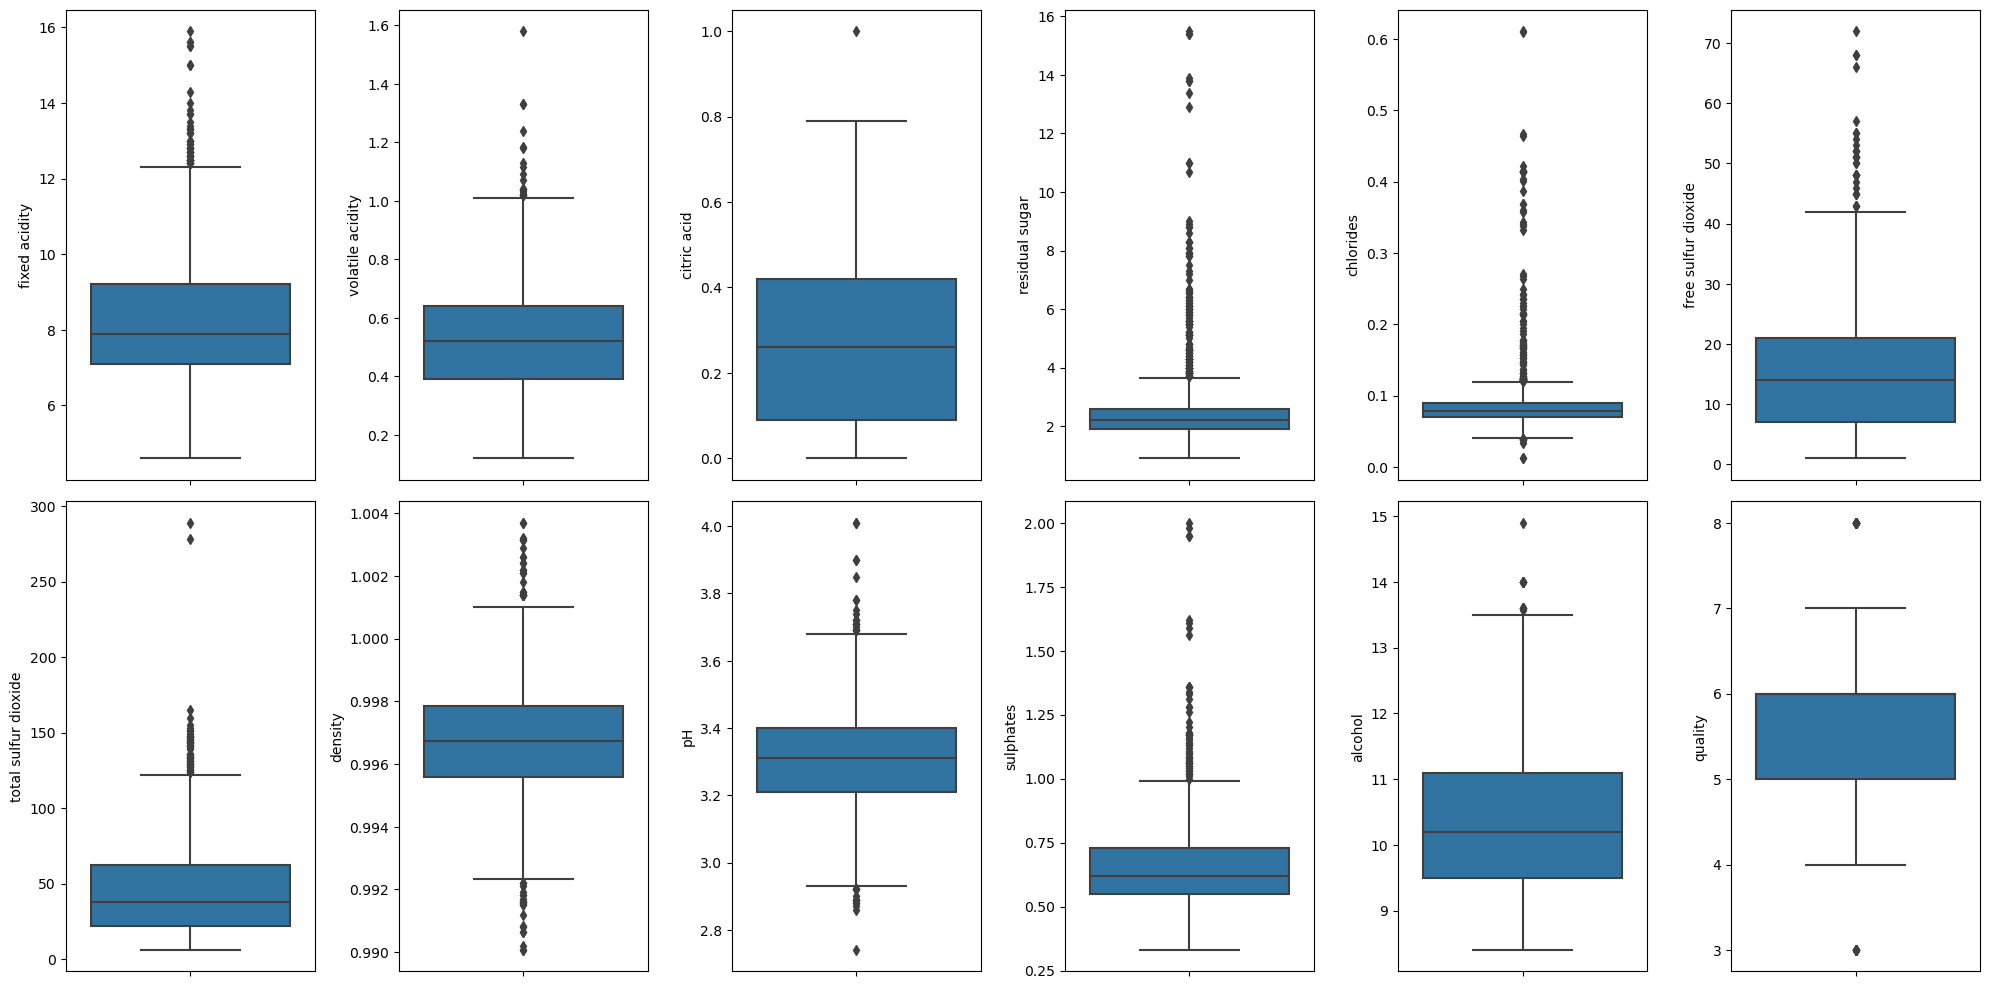

In [20]:
fig , ax = plt.subplots(ncols=6, nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()

for col,value in df.items():
    if col != ['quality','Good_quality']:
        sns.boxplot(y= col , data = df, ax = ax[index])
        index+=1
plt.tight_layout()

In the fixed acidity we have some continous data so we can ignore the outliers present , if the outliers has so much difference then we have to remove the outliers for better accuracy of the model.

as we can see , we can remove the outliers from density, citric acid, residual sugar, chlorides , free sulpher dioxide

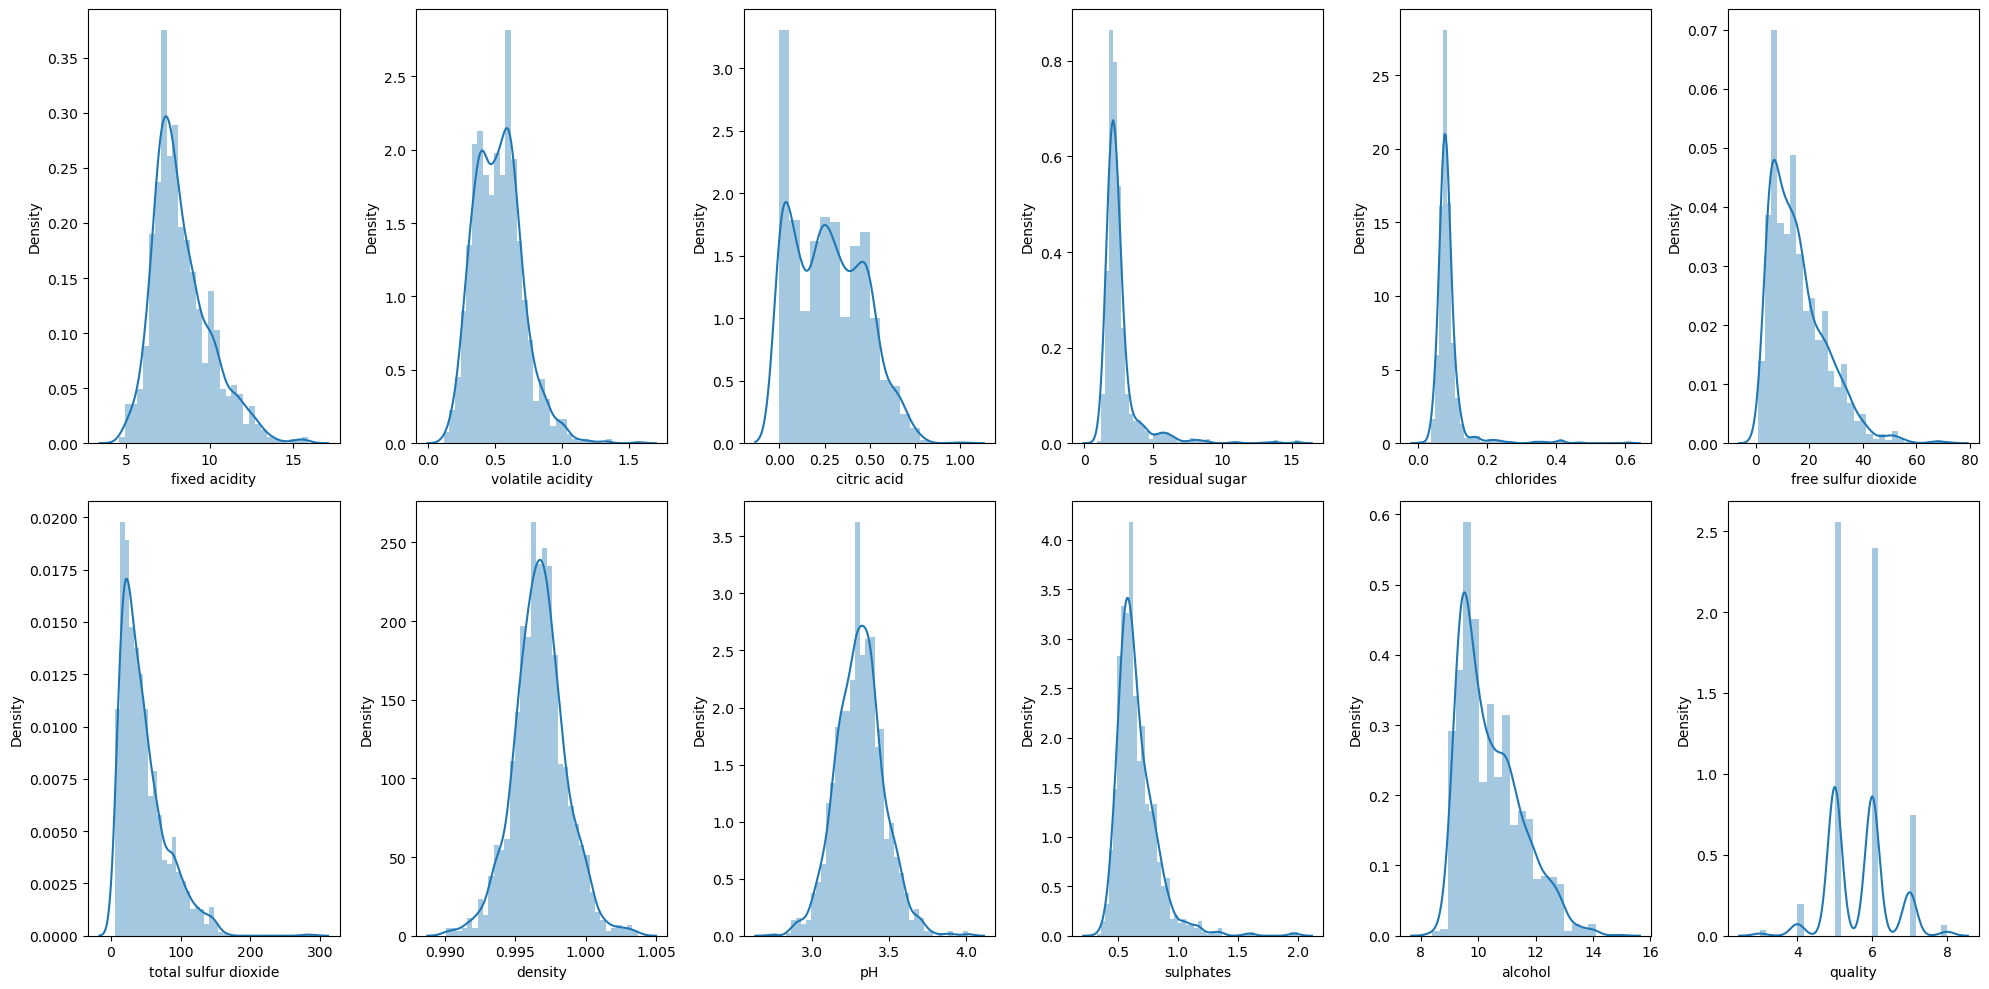

In [21]:
# Create distplot
fig , ax = plt.subplots(ncols=6, nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()

for col,value in df.items():
    if col != ['quality','Good_quality']:
        sns.distplot(value, ax = ax[index])
        index+=1
plt.tight_layout()

here we can see that all graphs are in approx normal distribution, we have valid values like range 0 - 10

In [23]:
df['free sulfur dioxide'] = np.log(1+df['free sulfur dioxide'])

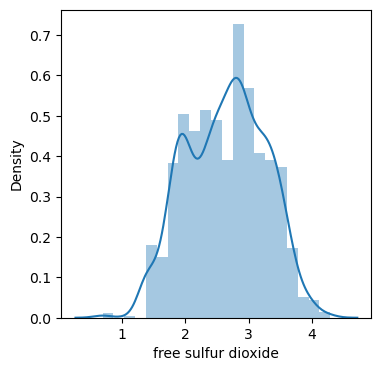

In [24]:
plt.figure(figsize=(4,4))
sns.distplot(df['free sulfur dioxide'])
plt.show()

In [25]:
df['total sulfur dioxide'] = np.log(1+ df['total sulfur dioxide'])

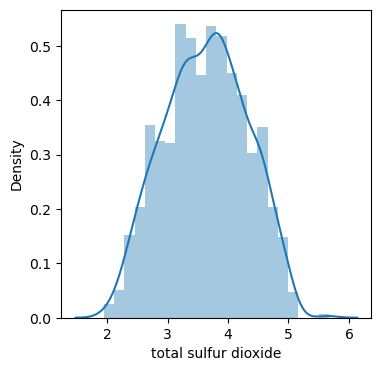

In [26]:
plt.figure(figsize=(4,4))
sns.distplot(df['total sulfur dioxide'])
plt.show()

Now we can see that all the values are in normal range and graphs also in normal distributed

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


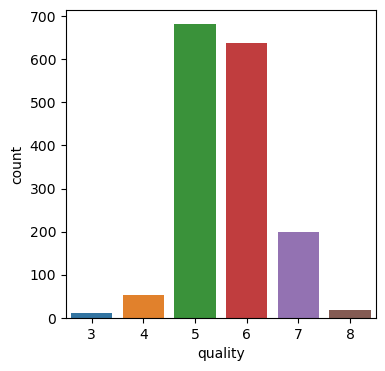

In [28]:
plt.figure(figsize=(4,4))
sns.countplot(x = 'quality',data = df)
print(df['quality'].value_counts())
plt.show()

here we can measure that there is some poor quality wines at 3 quality score and some best quality wines which is allocated at 8 and maximum wines are on average quality like 5,6



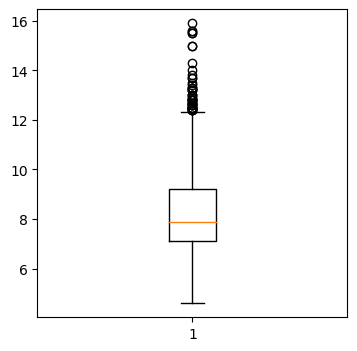

In [29]:
plt.figure(figsize=(4,4))
plt.boxplot(df['fixed acidity'])
plt.show()

here we can see some outliers present in the dataset but as of now we are not handeling this outliers

We can measures that here in some column outliers are present

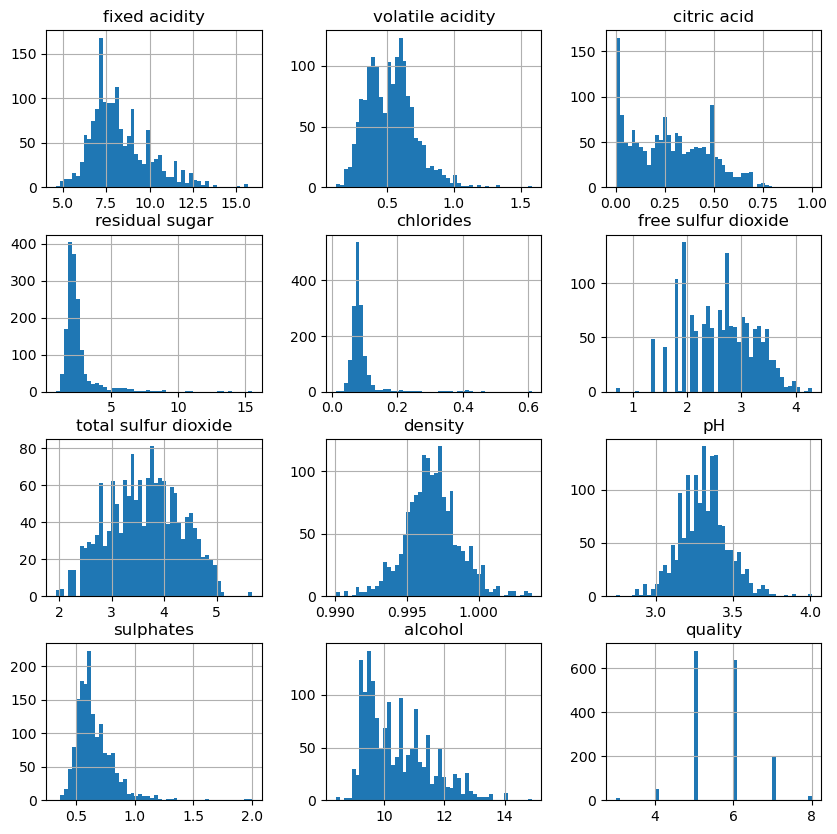

In [30]:
df.hist(figsize=(10,10),bins=50)
plt.show()

In [31]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [32]:
for i in df.columns:
    if df[i].skew() >0.5:
        df[i] = np.cbrt(df[i])

In [33]:
df.skew()

fixed acidity           0.587668
volatile acidity       -0.070512
citric acid             0.318337
residual sugar          2.532201
chlorides               3.059529
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.322148
alcohol                 0.725907
quality                 0.217802
dtype: float64

In [34]:
for i in df.columns:
    if df[i].skew() >0.5:
        df[i] = np.cbrt(df[i])

In [35]:
df.skew()

fixed acidity           0.458470
volatile acidity       -0.070512
citric acid             0.318337
residual sugar          2.032658
chlorides               2.191305
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.046979
alcohol                 0.682972
quality                 0.217802
dtype: float64

### Feature Selection


In [36]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [37]:
# here we assume that quality is 7 or above, it is a Good quality and lower than 7 is a Not Good quality
df['Good_quality'] = [1 if x>=7 else 0 for x in df['quality']]

1 is represent the good quality and 0 reprent the not good quality

In [38]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Good_quality
1421,1.250919,0.736806,0.18,1.053610,0.754248,3.218876,4.077537,0.99650,3.34,0.941270,1.282701,5,0
1473,1.222528,0.843433,0.08,1.067489,0.745353,2.708050,3.828641,0.99336,3.38,0.933826,1.305300,5,0
1085,1.237374,0.782974,0.08,1.067489,0.748788,3.713572,4.174387,0.99529,3.12,0.923799,1.285705,5,0
1118,1.243324,0.730614,0.12,1.085931,0.738077,2.708050,3.218876,0.99252,3.30,0.931889,1.333130,6,0
1329,1.249054,0.843433,0.26,1.085931,0.758399,2.890372,4.521789,0.99616,3.29,0.937607,1.288654,6,0
367,1.297190,0.831552,0.61,1.112009,0.751010,2.484907,3.218876,1.00000,3.16,0.959609,1.276518,5,0
547,1.299939,0.676790,0.49,1.107173,0.740566,1.945910,3.091042,0.99870,3.26,0.983382,1.301296,6,0
294,1.333130,0.697953,0.52,1.137962,0.768959,2.890372,3.988984,1.00140,3.05,0.976859,1.284210,6,0
682,1.268437,0.771944,0.31,1.094287,0.753181,3.496508,4.077537,0.99800,3.33,0.933826,1.288654,5,0
335,1.316756,0.885785,0.53,1.145653,0.795795,2.079442,3.091042,0.99920,3.17,0.980814,1.320403,7,1


In [39]:
# now saperate the dependent and dependent variable
x = df.drop(['quality','Good_quality'],axis=1)
y = df['Good_quality']

In [42]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.249054,0.887904,0.00,1.073922,0.751010,2.484907,3.555348,0.9978,3.51,0.937607,1.282701
1,1.256382,0.958284,0.00,1.112009,0.772528,3.258097,4.219508,0.9968,3.20,0.958054,1.288654
2,1.256382,0.912581,0.04,1.096963,0.767124,2.772589,4.007333,0.9970,3.26,0.953263,1.288654
3,1.307916,0.654213,0.56,1.073922,0.749906,2.890372,4.110874,0.9980,3.16,0.941270,1.288654
4,1.249054,0.887904,0.00,1.073922,0.751010,2.484907,3.555348,0.9978,3.51,0.937607,1.282701


In [43]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Good_quality, dtype: int64

In [40]:
df['Good_quality'].value_counts()

0    1382
1     217
Name: Good_quality, dtype: int64

### Feature Scaling using Standard Scalarization

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns= x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.491491,0.980285,-1.391472,-0.574525,-0.228285,-0.247127,-0.116363,0.558274,1.288643,-0.602727,-0.990783
1,-0.230706,1.745223,-1.391472,0.265709,0.526665,0.992765,0.856963,0.028261,-0.719933,0.251947,-0.574443
2,-0.230706,1.248486,-1.186070,-0.066212,0.337059,0.214202,0.546021,0.134264,-0.331177,0.051680,-0.574443
3,1.603384,-1.559625,1.484154,-0.574525,-0.267035,0.403079,0.697760,0.664277,-0.979104,-0.449617,-0.574443
4,-0.491491,0.980285,-1.391472,-0.574525,-0.228285,-0.247127,-0.116363,0.558274,1.288643,-0.602727,-0.990783
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.356871,0.496940,-0.980669,-0.439114,0.271409,1.375082,0.251938,-0.978765,0.899886,-0.449617,0.119099
1595,-1.596416,0.234881,-0.877968,-0.185443,-0.817682,1.683571,0.463822,-0.862162,1.353436,0.749933,0.772694
1596,-1.279310,0.013548,-0.723916,-0.066212,-0.228285,1.222242,0.115514,-0.533554,0.705508,0.690308,0.589745
1597,-1.596416,0.720613,-0.775267,-0.439114,-0.267035,1.375082,0.251938,-0.676657,1.677400,0.444510,-0.172942


we have scaled the data using standard scalarization method to overcome the issue of biasness

### Checking VIF

In [45]:
# finding varience inflation factor in each scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF Values,Features
0,8.122385,fixed acidity
1,1.853592,volatile acidity
2,3.024097,citric acid
3,1.934951,residual sugar
4,1.428178,chlorides
5,2.870413,free sulfur dioxide
6,3.150041,total sulfur dioxide
7,7.398485,density
8,3.525286,pH
9,1.404960,sulphates


Data is in normal form

### Model Training 

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [57]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is ', maxAccu,'at random state',maxRS)


Best accuracy is  0.9083333333333333 at random state 6


In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=6)

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9083333333333333
[[415   9]
 [ 35  21]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       424
           1       0.70      0.38      0.49        56

    accuracy                           0.91       480
   macro avg       0.81      0.68      0.72       480
weighted avg       0.90      0.91      0.90       480



In [60]:
# checking accuracy for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.91875
[[414  10]
 [ 29  27]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       424
           1       0.73      0.48      0.58        56

    accuracy                           0.92       480
   macro avg       0.83      0.73      0.77       480
weighted avg       0.91      0.92      0.91       480



In [61]:
# checking accuracy for KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8854166666666666
[[406  18]
 [ 37  19]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       424
           1       0.51      0.34      0.41        56

    accuracy                           0.89       480
   macro avg       0.71      0.65      0.67       480
weighted avg       0.87      0.89      0.87       480



In [62]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.90625
[[418   6]
 [ 39  17]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       424
           1       0.74      0.30      0.43        56

    accuracy                           0.91       480
   macro avg       0.83      0.64      0.69       480
weighted avg       0.89      0.91      0.89       480



In [63]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)
print(accuracy_score(y_test,predDTC))
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))

0.8666666666666667
[[389  35]
 [ 29  27]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       424
           1       0.44      0.48      0.46        56

    accuracy                           0.87       480
   macro avg       0.68      0.70      0.69       480
weighted avg       0.87      0.87      0.87       480



In [64]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train,y_train)
predGNB = GNB.predict(x_test)
print(accuracy_score(y_test,predGNB))
print(confusion_matrix(y_test,predGNB))
print(classification_report(y_test,predGNB))

0.8708333333333333
[[382  42]
 [ 20  36]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       424
           1       0.46      0.64      0.54        56

    accuracy                           0.87       480
   macro avg       0.71      0.77      0.73       480
weighted avg       0.89      0.87      0.88       480



In [65]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

In [66]:
# checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9020833333333333
[[407  17]
 [ 30  26]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       424
           1       0.60      0.46      0.53        56

    accuracy                           0.90       480
   macro avg       0.77      0.71      0.74       480
weighted avg       0.89      0.90      0.90       480



In [67]:
# checking accuracy for AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8979166666666667
[[411  13]
 [ 36  20]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       424
           1       0.61      0.36      0.45        56

    accuracy                           0.90       480
   macro avg       0.76      0.66      0.70       480
weighted avg       0.88      0.90      0.89       480



In [68]:
# checking accuracy for BaggingClassifier
BG = BaggingClassifier()
BG.fit(x_train,y_train)
predBG = BG.predict(x_test)
print(accuracy_score(y_test,predBG))
print(confusion_matrix(y_test,predBG))
print(classification_report(y_test,predBG))

0.9104166666666667
[[408  16]
 [ 27  29]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       424
           1       0.64      0.52      0.57        56

    accuracy                           0.91       480
   macro avg       0.79      0.74      0.76       480
weighted avg       0.90      0.91      0.91       480



In [69]:
# checking accuracy for ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = BG.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9104166666666667
[[408  16]
 [ 27  29]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       424
           1       0.64      0.52      0.57        56

    accuracy                           0.91       480
   macro avg       0.79      0.74      0.76       480
weighted avg       0.90      0.91      0.91       480



### Cross Vallidation Score

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
# checking cv score for Linear regression
score = cross_val_score(lr,x,y)         # by default cv = 5 selected
print(score)
print(score.mean())
print('difference blw Accuracy score and cross validation score is',accuracy_score(y_test,predlr) - score.mean())

[0.875      0.865625   0.9        0.85625    0.88401254]
0.8761775078369907
difference blw Accuracy score and cross validation score is 0.03215582549634266


In [72]:
# checking cv score for Random forest classifier
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('difference blw Accuracy score and cross validation score is',accuracy_score(y_test,predRFC) - score.mean())

[0.875      0.865625   0.878125   0.865625   0.88401254]
0.8736775078369906
difference blw Accuracy score and cross validation score is 0.04507249216300935


In [73]:
# checking cv score for Gradient Boosting Classifier
score = cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('difference blw Accuracy score and cross validation score is',accuracy_score(y_test,predGB) - score.mean())

[0.8875     0.85       0.878125   0.84375    0.87147335]
0.866169670846395
difference blw Accuracy score and cross validation score is 0.03591366248693839


In [74]:
# checking cv score for Support vector machine Classifier
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference blw Accuracy score and cross validation score is',accuracy_score(y_test,predsvc) - score.mean())

[0.878125   0.840625   0.896875   0.859375   0.86520376]
0.8680407523510972
difference blw Accuracy score and cross validation score is 0.03820924764890277


In [75]:
# checking cv score for AdaBoost Classifier
score = cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print('difference blw Accuracy score and cross validation score is',accuracy_score(y_test,predABC) - score.mean())

[0.88125    0.80625    0.896875   0.84375    0.86206897]
0.8580387931034483
difference blw Accuracy score and cross validation score is 0.03987787356321837


In [76]:
# checking cv score for Bagging Classifier
score = cross_val_score(BG,x,y)
print(score)
print(score.mean())
print('difference blw Accuracy score and cross validation score is',accuracy_score(y_test,predBG) - score.mean())

[0.875      0.853125   0.90625    0.84375    0.86833856]
0.8692927115987461
difference blw Accuracy score and cross validation score is 0.04112395506792055


In [77]:
# checking cv score for ExtraTrees Classifier
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print('difference blw Accuracy score and cross validation score is',accuracy_score(y_test,predBG) - score.mean())

[0.875      0.840625   0.88125    0.846875   0.87147335]
0.863044670846395
difference blw Accuracy score and cross validation score is 0.04737199582027163


In [78]:
# checking cv score for Gaussian NB
score = cross_val_score(GNB,x,y)
print(score)
print(score.mean())
print('difference blw Accuracy score and cross validation score is',accuracy_score(y_test,predGNB) - score.mean())

[0.896875   0.75       0.9        0.746875   0.87147335]
0.8330446708463951
difference blw Accuracy score and cross validation score is 0.03778866248693824


In [79]:
# checking cv score for Decision tree classifier
score = cross_val_score(DTC,x,y)
print(score)
print(score.mean())
print('difference blw Accuracy score and cross validation score is',accuracy_score(y_test,predDTC) - score.mean())

[0.846875   0.75625    0.840625   0.740625   0.78369906]
0.7936148119122256
difference blw Accuracy score and cross validation score is 0.07305185475444109


In [80]:
# checking cv score for KNN
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())
print('difference blw Accuracy score and cross validation score is',accuracy_score(y_test,predknn) - score.mean())

[0.8625     0.84375    0.8875     0.775      0.87460815]
0.8486716300940438
difference blw Accuracy score and cross validation score is 0.03674503657262285


### Hyper Parameter Tuning

In [81]:
# AdaBoost Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
            'random_state' : [10,50,1000],
            'max_depth' : [0,10,20],
            'n_jobs': [-2,-1,1],
            'n_estimators' : [50,100,200,300]}

In [83]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)

In [84]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [85]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 10}

In [86]:
Final_model = ExtraTreesClassifier(criterion = 'entropy',random_state = 10, max_depth = 20,n_estimators = 100,n_jobs = 2 )
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

92.5


### Plotting ROC and compare AUC for all models used

In [88]:
# plotting for all models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection

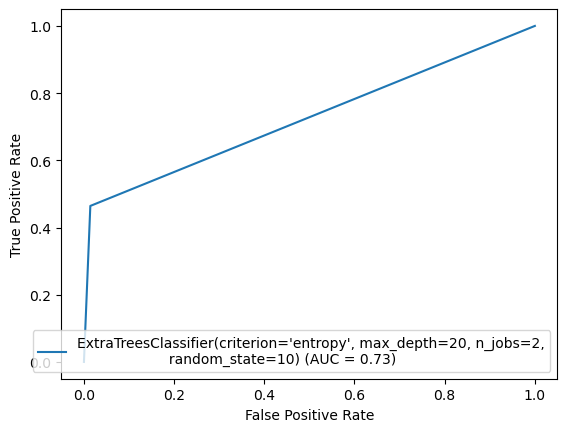

In [89]:
fpr , tpr, thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name = Final_model)
display.plot()

Here we have plotted the ROC curve for the final model and the AUC value for the best model.

### Save the model

In [90]:
import joblib
joblib.dump(Final_model,'Red_Wine_Quality_Prediction.pkl')

['Red_Wine_Quality_Prediction.pkl']

In [91]:
# lets load the saved model and get the predictions
model = joblib.load('Red_Wine_Quality_Prediction.pkl')

In [92]:
# prediction
prediction = model.predict(x_test)
prediction

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

These are the predicted red wine quality prediction

In [93]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] =prediction
df['Original'] = a
df

,Predicted,Original
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
475,0,0
476,0,0
477,0,0
478,0,0


Final Predicted value 